In [38]:
# Problem Statement

In [39]:
!python --version

Python 3.10.4


In [40]:
# 2. Data Gathering

import pandas as pd
import numpy as np

In [41]:
%%time
loan_df = pd.read_csv('Loan_Prediction.csv')
loan_df

CPU times: total: 31.2 ms
Wall time: 6.98 ms


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [42]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
loan_df.isna().sum()/len(loan_df) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [45]:
loan_df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [46]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace = True)

In [48]:
x = loan_df['Gender'].mode()[0]
x

'Male'

In [49]:
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace = True)

In [50]:
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace = True)

In [51]:
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0], inplace = True)

In [52]:
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean(), inplace = True)

In [53]:
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace = True)

In [54]:
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace = True)

In [55]:
### Need to change data types

In [56]:
loan_df['Gender'].replace({'Male':1, 'Female':0}, inplace = True)

In [57]:
loan_df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [58]:
loan_df['Married'].replace({'Yes':1, 'No':0}, inplace = True)

In [59]:
loan_df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [60]:
loan_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [61]:
loan_df['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace = True)

In [62]:
loan_df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [63]:
loan_df['Self_Employed'].replace({'Yes':1, 'No':0}, inplace = True)

In [64]:
loan_df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [65]:
loan_df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [66]:
loan_df['Loan_Status'].replace({'Y':1, 'N':0}, inplace = True)

In [67]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()

In [70]:
loan_df['Dependents'] = le.fit_transform(loan_df['Dependents'])

In [71]:
loan_df['Property_Area'] = le.fit_transform(loan_df['Property_Area'])

In [72]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(2), int64(6), object(1)
memory usage: 57.7+ KB


In [73]:
### All the attributes are in Numeric state

In [74]:
import seaborn as sns

C:\Users\Shridhar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

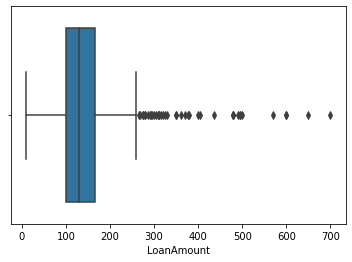

In [75]:
sns.boxplot(loan_df['LoanAmount'])

In [76]:
import matplotlib.pyplot as plt

<AxesSubplot:>

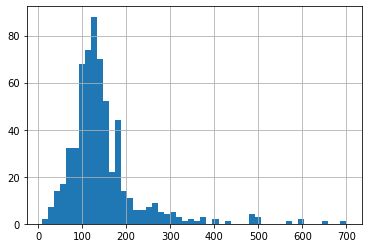

In [77]:
loan_df['LoanAmount'].hist(bins = 50)

(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([2.19722458, 2.63261015, 3.06799573, 3.5033813 , 3.93876688,
        4.37415246, 4.80953803, 5.24492361, 5.68030918, 6.11569476,
        6.55108034]),
 <BarContainer object of 10 artists>)

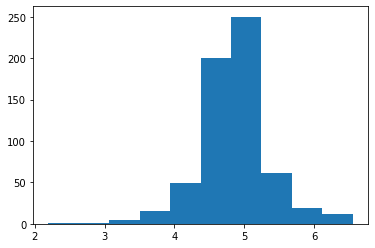

In [78]:
plt.hist(np.log(loan_df['LoanAmount']))

In [79]:
loan_df['log_LoanAmount'] = np.log(loan_df['LoanAmount'])

C:\Users\Shridhar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='log_LoanAmount'>

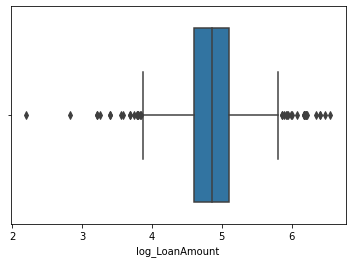

In [80]:
sns.boxplot(loan_df['log_LoanAmount'])

C:\Users\Shridhar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_LoanAmount', ylabel='Density'>

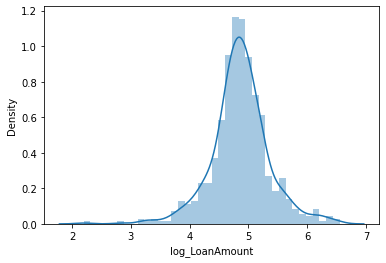

In [81]:
sns.distplot(loan_df['log_LoanAmount'], kde = True)

In [82]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_LoanAmount'],
      dtype='object')

In [83]:
loan_df['TotalIncome'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']

C:\Users\Shridhar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalIncome'>

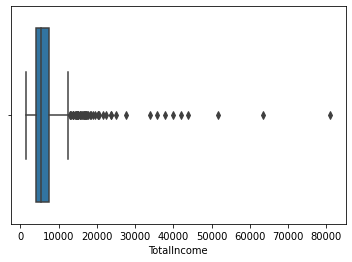

In [84]:
sns.boxplot(loan_df['TotalIncome'])

<AxesSubplot:>

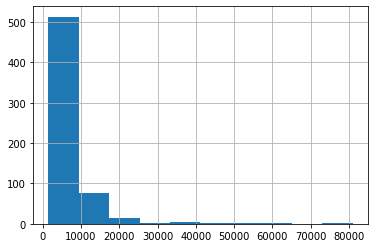

In [85]:
loan_df['TotalIncome'].hist()

In [86]:
loan_df['log_TotalIncome'] = np.log(loan_df['TotalIncome'])

In [87]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,TotalIncome,log_TotalIncome
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [88]:
# Feature Selection 

In [89]:
loan_df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'], axis = 1,
            inplace = True)

In [90]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_LoanAmount', 'log_TotalIncome'],
      dtype='object')

In [91]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_TotalIncome
0,1,0,0,1,0,360.0,1.0,2,1,4.986426,8.674026
1,1,1,1,1,0,360.0,1.0,0,0,4.852030,8.714568
2,1,1,0,1,1,360.0,1.0,2,1,4.189655,8.006368
3,1,1,0,0,0,360.0,1.0,2,1,4.787492,8.505323
4,1,0,0,1,0,360.0,1.0,2,1,4.948760,8.699515


In [92]:
loan_df = loan_df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'log_LoanAmount', 'log_TotalIncome','Loan_Status']]

In [93]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_TotalIncome,Loan_Status
0,1,0,0,1,0,360.0,1.0,2,4.986426,8.674026,1
1,1,1,1,1,0,360.0,1.0,0,4.852030,8.714568,0
2,1,1,0,1,1,360.0,1.0,2,4.189655,8.006368,1
3,1,1,0,0,0,360.0,1.0,2,4.787492,8.505323,1
4,1,0,0,1,0,360.0,1.0,2,4.948760,8.699515,1


In [94]:
X = loan_df.drop(columns = ['Loan_Status'])
y = loan_df['Loan_Status']

In [95]:
X.shape

(614, 10)

In [96]:
y.shape

(614,)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1, stratify=y)

# Logestic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
%%time
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)
model

CPU times: total: 46.9 ms
Wall time: 39.4 ms


C:\Users\Shridhar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
y_pred_logreg = model.predict(X_test)
y_pred_logreg[0:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [102]:
y_test[:10]

22     0
604    1
181    0
85     1
391    1
196    1
464    0
147    1
577    1
447    0
Name: Loan_Status, dtype: int64

In [139]:
logreg.coef_

array([[ 4.31322138e-02,  5.15365612e-01, -1.87545075e-03,
         2.10668927e-01,  5.52615363e-03, -1.68260620e-03,
         3.04273155e+00,  4.51770213e-02, -2.23983431e-01,
        -7.43168916e-02]])

In [140]:
logreg.intercept_

array([-0.05142376])

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

In [104]:
accuracy_score(y_test,y_pred_logreg)

0.8373983739837398

In [105]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        38
           1       0.81      1.00      0.89        85

    accuracy                           0.84       123
   macro avg       0.90      0.74      0.77       123
weighted avg       0.87      0.84      0.82       123



In [106]:
confusion_matrix(y_test,y_pred_logreg)

array([[18, 20],
       [ 0, 85]], dtype=int64)

In [107]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10, stratify=y)

In [108]:
# logreg = LogisticRegression()
# model = logreg.fit(X_train,y_train)
# y_pred_logreg = model.predict(X_test)
# accuracy_score(y_test,y_pred_logreg)

In [109]:
precision_logreg = precision_score(y_test,y_pred_logreg)
precision_logreg

0.8095238095238095

# Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
tree_clf = DecisionTreeClassifier()

In [112]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [113]:
y_pred_tree_clf = tree_clf.predict(X_test)

In [114]:
y_pred_tree_clf[0:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [115]:
y_test[0:10]

22     0
604    1
181    0
85     1
391    1
196    1
464    0
147    1
577    1
447    0
Name: Loan_Status, dtype: int64

In [116]:
accuracy_score(y_test,y_pred_tree_clf)

0.7398373983739838

In [117]:
precision_tree = precision_score(y_test, y_pred_tree_clf)

In [118]:
precision_tree

0.8192771084337349

In [119]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [120]:
hyp = { 'criterion' : ['gini','entropy'],
        'max_depth' : np.arange(2,10),
        'min_samples_split' : np.arange(2,5),
        'min_samples_leaf' : np.arange(2,5)
    
}

In [121]:
rscv_tree_clf  =  RandomizedSearchCV(tree_clf,hyp,cv=5)
rscv_tree_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4])})

In [122]:
rscv_tree_clf.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_depth': 2,
 'criterion': 'entropy'}

In [123]:
y_pred_rscv_tree_clf = rscv_tree_clf.predict(X_test)
y_pred_rscv_tree_clf[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [124]:
accuracy_score(y_test,y_pred_rscv_tree_clf)

0.8373983739837398

In [125]:
precision_tree_hyp = precision_score(y_test,y_pred_rscv_tree_clf)

In [126]:
precision_tree_hyp

0.8095238095238095

In [127]:
from xgboost import XGBClassifier

In [128]:
%%time
xgb = XGBClassifier(n_estimators = 10)
xgb.fit(X_train,y_train)

CPU times: total: 93.8 ms
Wall time: 75.3 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [129]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb[0:5]

array([0, 1, 1, 1, 1])

In [130]:
y_test[0:5]

22     0
604    1
181    0
85     1
391    1
Name: Loan_Status, dtype: int64

In [131]:
accuracy_score(y_test,y_pred_xgb)

0.8211382113821138

In [132]:
precision_xgb = precision_score(y_test,y_pred_xgb)
precision_xgb

0.8181818181818182

In [133]:
##### Evaluate the Model

In [134]:
print('Logestic Regression :', precision_logreg)
print('Decision Tree :',precision_tree )
print('Decision Tree hyp :', precision_tree_hyp)
print('XGB classifier :', precision_xgb)

Logestic Regression : 0.8095238095238095
Decision Tree : 0.8192771084337349
Decision Tree hyp : 0.8095238095238095
XGB classifier : 0.8181818181818182


In [135]:
import pickle

In [136]:
model = pickle.dump(logreg,open('model.pkl','wb'))

### User Test Function

In [137]:
def prediction(user_input_data):

    result = logreg.predict([user_input_data])
    print(result)

In [138]:
user_input_data.shape

NameError: name 'user_input_data' is not defined

In [ ]:
user_input_data = X_test.iloc[1][::]


In [ ]:
result = prediction(user_input_data)